### Heroes Of Pymoli Data Analysis
* Of the 1163 active players, the vast majority are male (84%). There also exists, a smaller, but notable proportion of female players (14%).

* Our peak age demographic falls between 20-24 (44.8%) with secondary groups falling between 15-19 (18.60%) and 25-29 (13.4%). 

* Females are a smaller group but with larger spend

* Price does not influence the popularity of an item

* The 35-39 age group is more than one standard deviation from the average total spend but only 5% of the users, bring more to the game. You could say the same of the under 10 crowd, but that's not necessarily ethical 
-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [126]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

Purchase ID             SN  Age Gender  Item ID  \
0            0        Lisim78   20   Male      108   
1            1    Lisovynya38   40   Male      143   
2            2     Ithergue48   24   Male       92   
3            3  Chamassasya86   24   Male      100   
4            4      Iskosia90   23   Male      131   

                                   Item Name  Price  
0  Extraction, Quickblade Of Trembling Hands   3.53  
1                          Frenzied Scimitar   1.56  
2                               Final Critic   4.88  
3                                Blindscythe   3.27  
4                                       Fury   1.44

In [127]:
#are there any missing cells?
purchase_data.count()

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

In [128]:
# IRL this would be 3 different tables - a user table, an item table, and a table of orders
# let's take that approach:

#make my user table

users_df = purchase_data[["SN","Age","Gender"]].copy()
users_df = users_df.drop_duplicates()

#make my item table
items_df = purchase_data[["Item ID", "Item Name", "Price"]].copy()
items_df = items_df.drop_duplicates()

#make my orders table
orders_df = purchase_data[["Purchase ID", "SN", "Item ID","Item Name", "Price"]].copy()


## Player Count

* Display the total number of players


In [129]:
total_players = len(users_df)
player_count = pd.DataFrame({"Total Players":[total_players]})
player_count

Total Players
0            576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [130]:
unique_items = len(items_df["Item Name"].unique()) #there are more unique item numbers than name << that's data problem

average_price = items_df["Price"].mean()

num_purchases = len(orders_df["Purchase ID"])

avg_price = orders_df["Price"].mean()

total_rev = orders_df["Price"].sum()

purchasing_analysis = pd.DataFrame({"Number of Unique Items": [unique_items],
                                     "Average Price": ['${:,.3}'.format(average_price)],
                                    "Number of Purchases": [num_purchases],
                                    "Total Revenue": ['${:}'.format(total_rev)]
                                      })

purchasing_analysis

Number of Unique Items Average Price  Number of Purchases Total Revenue
0                     179         $3.04                  780      $2379.77

## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [131]:
gender_demo = users_df.groupby(["Gender"])
gender_demo = pd.DataFrame(gender_demo["SN"].count())
all_genders = gender_demo["SN"].sum()

gender_demo["Percentage of Players"] = (gender_demo["SN"]/all_genders)*100
#clean up
gender_demo = gender_demo.rename(columns={"SN": "Total Count"})
gender_demo["Percentage of Players"] = gender_demo["Percentage of Players"].map("{:.2f}".format)
gender_demo = gender_demo.sort_values(by="Total Count", ascending=False)

gender_demo

Total Count Percentage of Players
Gender                                                  
Male                           484                 84.03
Female                          81                 14.06
Other / Non-Disclosed           11                  1.91

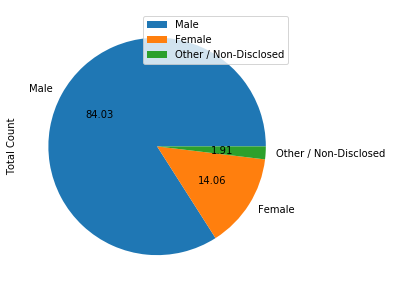

In [140]:
#let's be extra and make this a pie chart
plot = gender_demo.plot.pie(y='Total Count', autopct='%.2f', figsize=(5, 5))


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [132]:
gender_purchases = purchase_data.groupby(["SN", "Gender"])
uniques = gender_purchases.count().groupby(["Gender"]).count()
uniques.groupby(["Gender"]).count()
uniques
grouped_purchases = purchase_data.groupby(["Gender"])
#grouped_purchases.count().head()

gender_counts = purchase_data["Gender"].value_counts()
#gender_counts.head()

gender_purchases = grouped_purchases["Price"].sum()
#gender_purchases.head()

average_purchase = grouped_purchases["Price"].mean()
#average_purchase.head()



gender_summary = pd.DataFrame({"Purchase Count":gender_counts,
                               "Avg Purchase Price":average_purchase,
                               "Total Purchase Value":gender_purchases})
gender_summary["Avg Purchase Price"] = gender_summary["Avg Purchase Price"].map("${:.2f}".format)

#gender_summary.head()

merged = pd.merge(uniques, gender_summary, right_index=True, left_index=True)

#don't need these columns
del merged["Age"]
del merged["Item ID"]
del merged["Item Name"]
del merged["Price"]
#merged.head()

#add average per person

merged["Avg Total Purchase per Person"] = merged["Total Purchase Value"]/merged["Purchase ID"]

# format price columns
merged["Total Purchase Value"] = merged["Total Purchase Value"].map("${:.2f}".format)
merged["Avg Total Purchase per Person"] = merged["Avg Total Purchase per Person"].map("${:.2f}".format)

gender_pa_df = merged[["Purchase Count", "Avg Purchase Price", "Total Purchase Value", "Avg Total Purchase per Person" ]]

gender_pa_df


Purchase Count Avg Purchase Price Total Purchase Value  \
Gender                                                                          
Female                            113              $3.20              $361.94   
Male                              652              $3.02             $1967.64   
Other / Non-Disclosed              15              $3.35               $50.19   

                      Avg Total Purchase per Person  
Gender                                               
Female                                        $4.47  
Male                                          $4.07  
Other / Non-Disclosed                         $4.56

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [133]:
#bin it
# get max age

max_age = users_df["Age"].max()
bins = [0, 9, 14, 19, 24, 29, 34, 39, max_age ]
bin_labels = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# Slice the data and place it into bins
pd.cut(users_df["Age"], bins, labels=bin_labels).head()

# Place the data series into a new column inside of the DataFrame
users_df["Age Group"] = pd.cut(users_df["Age"], bins, labels=bin_labels)


#group the ages
age_demos = users_df.groupby("Age Group")

#print(grouped_ages["Age"].count())


age_demos = age_demos[["Age"]].count()
age_demos["Percentage of Players"] = (age_demos["Age"]/total_players)*100

#rename my Age column and format % of players
age_demos = age_demos.rename(columns={"Age":"Total Count"})
age_demos["Percentage of Players"] = age_demos["Percentage of Players"].map("{:.2f}".format)

age_demos

Total Count Percentage of Players
Age Group                                   
<10                 17                  2.95
10-14               22                  3.82
15-19              107                 18.58
20-24              258                 44.79
25-29               77                 13.37
30-34               52                  9.03
35-39               31                  5.38
40+                 12                  2.08

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [134]:
# all I need is the age and price for each purchase
purchase_analysis_age = purchase_data[["Age", "Price"]]

#use the bins from the gender_demos

# Slice the data and place it into bins
pd.cut(purchase_analysis_age["Age"], bins, labels=bin_labels).head()

# Place the data series into a new column inside of the DataFrame
purchase_analysis_age["Age Group"] = pd.cut(purchase_analysis_age["Age"], bins, labels=bin_labels)
purchase_analysis_age.head()

#group the ages
pa_grouped_ages = purchase_analysis_age.groupby("Age Group")

#print(pa_grouped_ages["Age"].count())

pa_age_counts = pa_grouped_ages[["Age"]].count()
pa_age_totalspend = pa_grouped_ages[["Price"]].sum()

pa_age_counts
pa_age_totalspend

merge_spend_age = pd.merge(pa_age_counts, pa_age_totalspend, on="Age Group")
merge_spend_age

#rename columns
merge_spend_age = merge_spend_age.rename(columns={"Age":"Purchase Count", "Price": "Total Purchase Value"})

merge_spend_age

#average purchase price is just total/count
merge_spend_age["Average Purchase Price"] = (merge_spend_age["Total Purchase Value"]/merge_spend_age["Purchase Count"])
merge_spend_age

#average total per person is just total/count of unique
merge_spend_age["Avg Total Purchase per Person"] = (merge_spend_age["Total Purchase Value"]/age_demos["Total Count"])
merge_spend_age

# reorder the damn columns
merge_spend_age = merge_spend_age[["Purchase Count","Average Purchase Price","Total Purchase Value", "Avg Total Purchase per Person"]]
merge_spend_age


#format the prices as prices
merge_spend_age["Average Purchase Price"] = merge_spend_age["Average Purchase Price"].map("${:.2f}".format)
merge_spend_age["Total Purchase Value"] = merge_spend_age["Total Purchase Value"].map("${:.2f}".format)
merge_spend_age["Avg Total Purchase per Person"] = merge_spend_age["Avg Total Purchase per Person"].map("${:.2f}".format)



merge_spend_age

/Users/laurelstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Purchase Count Average Purchase Price Total Purchase Value  \
Age Group                                                               
<10                    23                  $3.35               $77.13   
10-14                  28                  $2.96               $82.78   
15-19                 136                  $3.04              $412.89   
20-24                 365                  $3.05             $1114.06   
25-29                 101                  $2.90              $293.00   
30-34                  73                  $2.93              $214.00   
35-39                  41                  $3.60              $147.67   
40+                    13                  $2.94               $38.24   

          Avg Total Purchase per Person  
Age Group                                
<10                               $4.54  
10-14                             $3.76  
15-19                             $3.86  
20-24                             $4.32  
25-29                             $3.81  
30-34                             $4.12  
35-39                             $4.76  
40+                               $3.19

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [135]:
user_purchases = purchase_data.groupby("SN")["Price"].agg(['sum','count'])
up_clean = user_purchases.rename(columns={"sum":"Total Purchase Value", "count":"Purchase Count"})
up_clean = up_clean[["Purchase Count", "Total Purchase Value"]]

# sort with highest spend first
up_sorted = up_clean.sort_values(by="Total Purchase Value", ascending=False)

# add the average purchase by dividing total by count
up_sorted["Average Purchase Price"] = up_sorted["Total Purchase Value"]/up_sorted["Purchase Count"]

# reorder the columns
up_sorted = up_sorted[["Purchase Count","Average Purchase Price","Total Purchase Value"]]

# format as prices
up_sorted["Average Purchase Price"] = up_sorted["Average Purchase Price"].map("${:.2f}".format)
up_sorted["Total Purchase Value"] = up_sorted["Total Purchase Value"].map("${:.2f}".format)
up_sorted.head()

Purchase Count Average Purchase Price Total Purchase Value
SN                                                                     
Lisosia93                 5                  $3.79               $18.96
Idastidru52               4                  $3.86               $15.45
Chamjask73                3                  $4.61               $13.83
Iral74                    4                  $3.40               $13.62
Iskadarya95               3                  $4.37               $13.10

## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [136]:
items = purchase_data.loc[:, ["Item ID", "Item Name", "Price"]]
#items.head()

item_counts = items.groupby(["Item ID","Item Name"])["Price"].agg(['count','sum'])
clean_counts = item_counts.rename(columns={"count":"Purchase Count", "sum":"Total Purchase Value" })
clean_counts.head()
clean_counts["Item Price"] = clean_counts["Total Purchase Value"]/clean_counts["Purchase Count"]
clean_counts = clean_counts[["Purchase Count", "Item Price", "Total Purchase Value"]]
popular = clean_counts.sort_values(by="Purchase Count", ascending=False)

#apply formatting
popular["Item Price"] = popular["Item Price"].map("${:.2f}".format)
popular["Total Purchase Value"] = popular["Total Purchase Value"].map("${:.2f}".format)

popular.head(10)

Purchase Count  \
Item ID Item Name                                                      
178     Oathbreaker, Last Hope of the Breaking Storm              12   
145     Fiery Glass Crusader                                       9   
108     Extraction, Quickblade Of Trembling Hands                  9   
82      Nirvana                                                    9   
19      Pursuit, Cudgel of Necromancy                              8   
103     Singed Scalpel                                             8   
75      Brutality Ivory Warmace                                    8   
72      Winter's Bite                                              8   
60      Wolf                                                       8   
59      Lightning, Etcher of the King                              8   

                                                     Item Price  \
Item ID Item Name                                                 
178     Oathbreaker, Last Hope of the Breaking Storm      $4.23   
145     Fiery Glass Crusader                              $4.58   
108     Extraction, Quickblade Of Trembling Hands         $3.53   
82      Nirvana                                           $4.90   
19      Pursuit, Cudgel of Necromancy                     $1.02   
103     Singed Scalpel                                    $4.35   
75      Brutality Ivory Warmace                           $2.42   
72      Winter's Bite                                     $3.77   
60      Wolf                                              $3.54   
59      Lightning, Etcher of the King                     $4.23   

                                                     Total Purchase Value  
Item ID Item Name                                                          
178     Oathbreaker, Last Hope of the Breaking Storm               $50.76  
145     Fiery Glass Crusader                                       $41.22  
108     Extraction, Quickblade Of Trembling Hands                  $31.77  
82      Nirvana                                                    $44.10  
19      Pursuit, Cudgel of Necromancy                               $8.16  
103     Singed Scalpel                                             $34.80  
75      Brutality Ivory Warmace                                    $19.36  
72      Winter's Bite                                              $30.16  
60      Wolf                                                       $28.32  
59      Lightning, Etcher of the King                              $33.84

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [137]:
profitable = clean_counts.sort_values(by="Total Purchase Value", ascending=False)

#apply formatting
profitable["Item Price"] = profitable["Item Price"].map("${:.2f}".format)
profitable["Total Purchase Value"] = profitable["Total Purchase Value"].map("${:.2f}".format)

profitable.head(10)

Purchase Count  \
Item ID Item Name                                                      
178     Oathbreaker, Last Hope of the Breaking Storm              12   
82      Nirvana                                                    9   
145     Fiery Glass Crusader                                       9   
92      Final Critic                                               8   
103     Singed Scalpel                                             8   
59      Lightning, Etcher of the King                              8   
108     Extraction, Quickblade Of Trembling Hands                  9   
78      Glimmer, Ender of the Moon                                 7   
72      Winter's Bite                                              8   
60      Wolf                                                       8   

                                                     Item Price  \
Item ID Item Name                                                 
178     Oathbreaker, Last Hope of the Breaking Storm      $4.23   
82      Nirvana                                           $4.90   
145     Fiery Glass Crusader                              $4.58   
92      Final Critic                                      $4.88   
103     Singed Scalpel                                    $4.35   
59      Lightning, Etcher of the King                     $4.23   
108     Extraction, Quickblade Of Trembling Hands         $3.53   
78      Glimmer, Ender of the Moon                        $4.40   
72      Winter's Bite                                     $3.77   
60      Wolf                                              $3.54   

                                                     Total Purchase Value  
Item ID Item Name                                                          
178     Oathbreaker, Last Hope of the Breaking Storm               $50.76  
82      Nirvana                                                    $44.10  
145     Fiery Glass Crusader                                       $41.22  
92      Final Critic                                               $39.04  
103     Singed Scalpel                                             $34.80  
59      Lightning, Etcher of the King                              $33.84  
108     Extraction, Quickblade Of Trembling Hands                  $31.77  
78      Glimmer, Ender of the Moon                                 $30.80  
72      Winter's Bite                                              $30.16  
60      Wolf                                                       $28.32